#**Sales Analysis Project**
*Prepared by:*
Mona Alrougi -
Sara Al amar -
Nourah Almutiri

##**1. Introduction**

**AAL**, a renowned clothing brand in Australia, has been a household name since its inception in 2000. With a wide range of offerings for all age groups, including kids, women, men, and seniors, AAL has established a strong presence across various states in Australia, spanning from metropolises to tier-1 and tier-2 cities.

As AAL continues to experience significant growth in its business, the company is now focused on expanding its operations further. To facilitate this expansion and enable informed investment decisions, our role as data analysts is to analyze their dataset thoroughly and gain a comprehensive understanding of their sales performance.

____

##**2. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import datetime
from collections import Counter
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
import os
import plotly.graph_objs as go
import seaborn as sns

____

##**3. Load and Examine the data**

In [2]:
data = pd.read_excel("/content/Sales_Data.xlsx")

In [3]:
data.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [4]:
data.tail()

,Date,Time,State,Group,Unit,Sales
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500
7559,2020-12-30,Evening,TAS,Seniors,13,32500


In [5]:
data.shape

(7560, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


In [7]:
data.describe().round(2)

,Unit,Sales
count,7560.00,7560.00
mean,18.01,45013.56
std,12.90,32253.51
min,2.00,5000.00
25%,8.00,20000.00
50%,14.00,35000.00
75%,26.00,65000.00
max,65.00,162500.00


_____

##**4. Data Cleaning and Preparation**

In [8]:
missing_values = data.isna().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [9]:
data.duplicated().sum()

0

In [10]:
data['Time'].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [11]:
data['Time'] = data['Time'].str.strip()

In [12]:
data['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [13]:
data['State'] = data['State'].str.strip()

In [14]:
data['Group'].unique()

array([' Kids', ' Men', ' Women', ' Seniors'], dtype=object)

In [15]:
data['Group'] = data['Group'].str.strip()

In [16]:
data['State'].unique()

array(['WA', 'NT', 'SA', 'VIC', 'QLD', 'NSW', 'TAS'], dtype=object)

In [17]:
# Replace state values with new names
data['State'] = data.State.str.strip().replace({'WA': 'Western Australia', 'NT': 'Northern Territory', 'SA': 'South Australia', 'VIC': 'Victoria', 'QLD':'Queensland', 'NSW':'New South Wales', 'TAS':'Tasmania'})

In [18]:
data.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,Western Australia,Kids,8,20000
1,2020-10-01,Morning,Western Australia,Men,8,20000
2,2020-10-01,Morning,Western Australia,Women,4,10000
3,2020-10-01,Morning,Western Australia,Seniors,15,37500
4,2020-10-01,Afternoon,Western Australia,Kids,3,7500


#### **Detect and handle outliers**

<Axes: ylabel='Sales'>

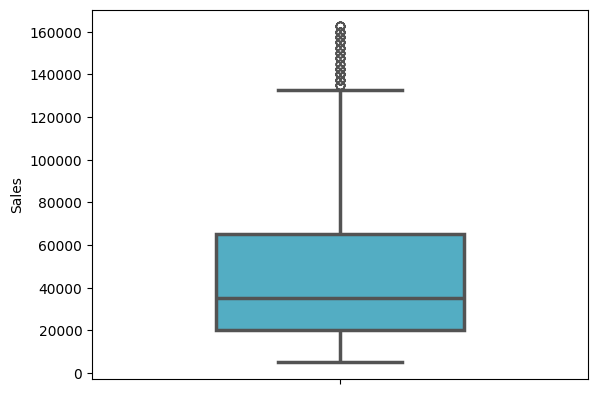

In [19]:
sns.boxplot(data['Sales'], color='#41B8D5', linewidth=2.5, width=0.5)

In [20]:
data[data.Sales > 122500]

,Date,Time,State,Group,Unit,Sales
46,2020-10-01,Evening,Victoria,Women,50,125000
204,2020-10-03,Morning,Victoria,Kids,50,125000
456,2020-10-06,Morning,Victoria,Kids,50,125000
799,2020-10-10,Afternoon,Victoria,Seniors,50,125000
876,2020-10-11,Morning,Victoria,Kids,50,125000
...,...,...,...,...,...,...
7434,2020-12-29,Afternoon,Victoria,Women,50,125000
7436,2020-12-29,Evening,Victoria,Kids,51,127500
7437,2020-12-29,Evening,Victoria,Men,54,135000
7515,2020-12-30,Morning,Victoria,Seniors,65,162500


Add explination

<Axes: ylabel='Unit'>

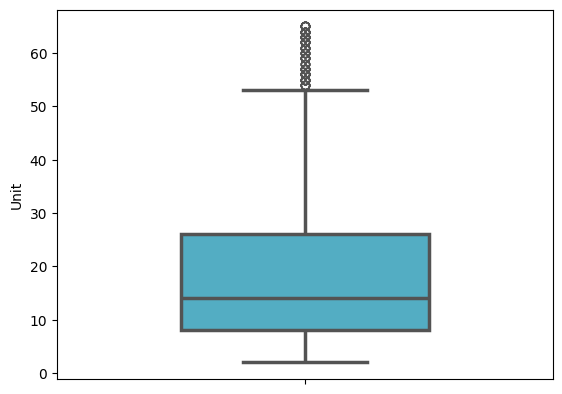

In [21]:
sns.boxplot(data['Unit'],color='#41B8D5', linewidth=2.5, width=0.5)

In [22]:
data[data.Unit > 53]

,Date,Time,State,Group,Unit,Sales
5082,2020-12-01,Afternoon,Victoria,Women,63,157500
5083,2020-12-01,Afternoon,Victoria,Seniors,62,155000
5161,2020-12-02,Morning,Victoria,Men,56,140000
5162,2020-12-02,Morning,Victoria,Women,59,147500
5169,2020-12-02,Evening,Victoria,Men,64,160000
...,...,...,...,...,...,...
7432,2020-12-29,Afternoon,Victoria,Kids,65,162500
7433,2020-12-29,Afternoon,Victoria,Men,54,135000
7437,2020-12-29,Evening,Victoria,Men,54,135000
7515,2020-12-30,Morning,Victoria,Seniors,65,162500


Add explaination

_____

##**5. Exploratory Data Analysis (EDA)**

In [23]:
# Group by 'State' and calculate the mean sales for each state
state_sales_mean = data.groupby('State')['Sales'].mean()
print(state_sales_mean)

State
New South Wales       69416.666667
Northern Territory    20907.407407
Queensland            30942.129630
South Australia       54497.685185
Tasmania              21074.074074
Victoria              97745.370370
Western Australia     20511.574074
Name: Sales, dtype: float64


In [24]:
# Group by 'State' and calculate the max sales for each state
state_sales_max = data.groupby('State')['Sales'].max()
print(state_sales_max)

State
New South Wales       112500
Northern Territory     37500
Queensland             62500
South Australia        87500
Tasmania               37500
Victoria              162500
Western Australia      37500
Name: Sales, dtype: int64


Descriptive statistical analysis on the data - Sales and Unit columns.

In [25]:
# Calculate mean
mean_sales = data['Sales'].mean()
mean_unit = data['Unit'].mean()

# Calculate median
median_sales = data['Sales'].median()
median_unit = data['Unit'].median()

# Calculate mode
mode_sales = data['Sales'].mode().values[0]
mode_unit = data['Unit'].mode().values[0]

# Calculate standard deviation
std_sales = data['Sales'].std()
std_unit = data['Unit'].std()

In [26]:
print("Sales:")
print("Mean:", mean_sales)
print("Median:", median_sales)
print("Mode:", mode_sales)
print("Standard Deviation:", std_sales)
print("\nUnit:")
print("Mean:", mean_unit)
print("Median:", median_unit)
print("Mode:", mode_unit)
print("Standard Deviation:", std_unit)

Sales:
Mean: 45013.5582010582
Median: 35000.0
Mode: 22500
Standard Deviation: 32253.506943966073

Unit:
Mean: 18.00542328042328
Median: 14.0
Mode: 9
Standard Deviation: 12.90140277758643


In [27]:
# Group by state and time, and find the maximum sales
max_sales_by_state_time = data.groupby(['State', 'Time'])['Sales'].max()

# Find the time(s) with the highest sales for each state
highest_sales_times = max_sales_by_state_time.groupby('State').idxmax().values

print("Time(s) with the highest sales for each state:")
for state, time in highest_sales_times:
    print(f"State: {state}, Time: {time}")


Time(s) with the highest sales for each state:
State: New South Wales, Time: Evening
State: Northern Territory, Time: Afternoon
State: Queensland, Time: Afternoon
State: South Australia, Time: Afternoon
State: Tasmania, Time: Afternoon
State: Victoria, Time: Afternoon
State: Western Australia, Time: Afternoon


##**6. Data Visualization**

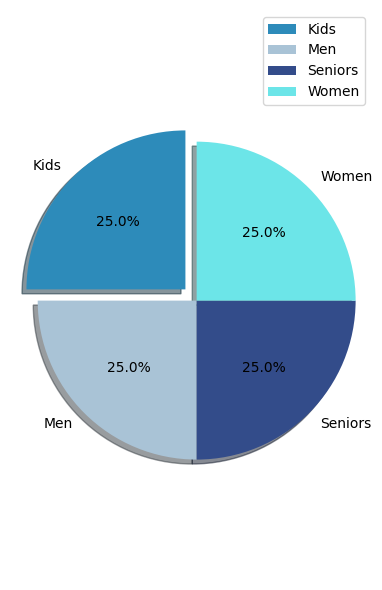

In [28]:
# Define custom colors
colors = ['#2d8bba', '#A9C3D6', '#334c8a', '#6ce5e8']

# Plot pie chart
explode = (0.1, 0, 0, 0)  # Explode the first slice (Kids)
fig1, ax1 = plt.subplots(figsize=(4, 6))
ax1.pie(data['Group'].value_counts(), explode=explode, labels=['Kids', 'Men', 'Seniors', 'Women'], autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)  # Use custom colors
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

***The pie chart illustrates the equal distribution of 'Group' categories within the dataset.***

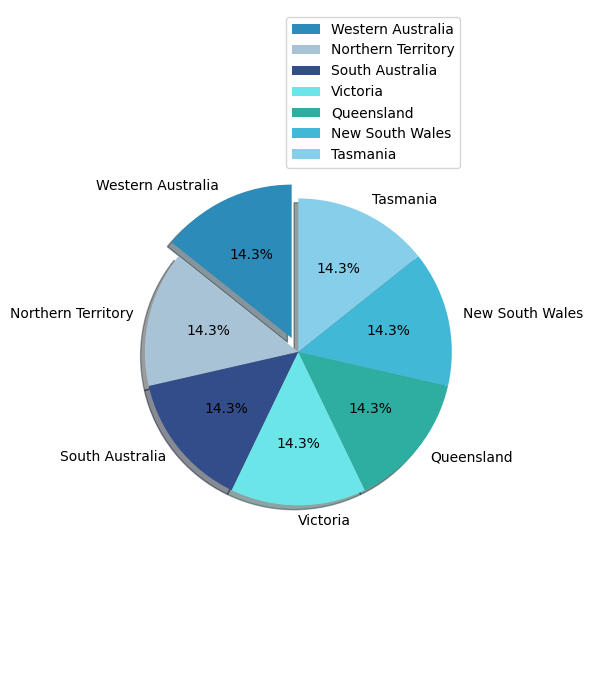

In [29]:
# Define custom colors
colors = ['#2d8bba', '#A9C3D6', '#334c8a', '#6ce5e8', '#2eaea1','#41b8d5','skyblue']

# Plot pie chart
explode = (0.1, 0, 0, 0, 0, 0, 0)  # Explode the first slice
fig1, ax1 = plt.subplots(figsize=(6, 7))
ax1.pie(data['State'].value_counts(), explode=explode, labels=data['State'].unique(), autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

***The pie chart illustrates the equal distribution of 'States'  within the dataset.***

In [30]:
group_sales = data.groupby('Group')['Sales'].sum()

In [31]:
highest_sales_group = group_sales.idxmax()
lowest_sales_group = group_sales.idxmin()

print(f"Highest Sales Group: {highest_sales_group} - Total Sales: {group_sales[highest_sales_group]}")
print(f"Lowest Sales Group: {lowest_sales_group} - Total Sales: {group_sales[lowest_sales_group]}")

Highest Sales Group: Men - Total Sales: 85750000
Lowest Sales Group: Seniors - Total Sales: 84037500


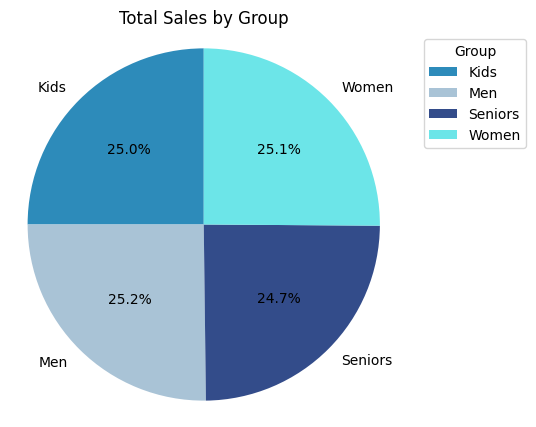

In [32]:
# Plot total sales for each group as a pie chart
plt.figure(figsize=(5, 5))
group_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#2d8bba', '#A9C3D6', '#334c8a', '#6ce5e8'])
plt.title('Total Sales by Group')
plt.ylabel('')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')
plt.show()

***According to the figure presented, the Men and Women groups are shown to have the highest sales, while the Seniors group is depicted with the lowest sales.***

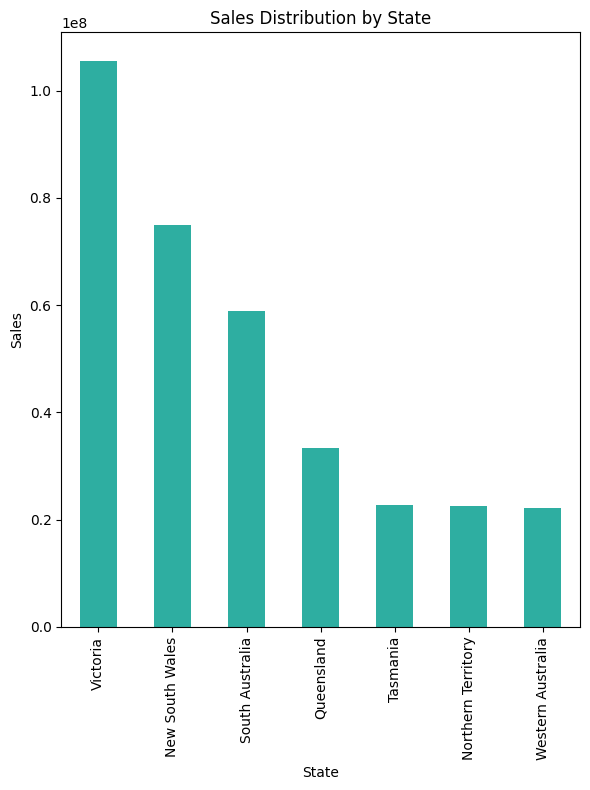

In [33]:
# Plot sales distribution by state
plt.figure(figsize=(6, 8))
data.groupby('State')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='#2eaea1')
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

***From the figure above, it is evident that Victoria state has the highest sales, while Western Australia has the lowest sales.***

In [34]:
group_states = data.groupby('State')['Sales'].sum()

In [35]:
highest_states_group = group_states.idxmax()
lowest_states_group = group_states.idxmin()

print(f"Highest Sales State: {highest_states_group} - Total Sales: {group_states[highest_states_group]}")

print(f"Lowest Sales State: {lowest_states_group} - Total Sales: {group_states[lowest_states_group]}")

Highest Sales State: Victoria - Total Sales: 105565000
Lowest Sales State: Western Australia - Total Sales: 22152500


<Figure size 1400x800 with 0 Axes>

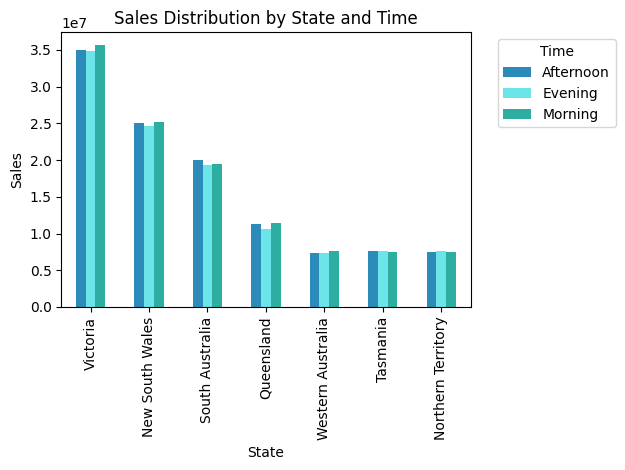

In [36]:
# Define custom colors
colors = ['#2d8bba', '#6ce5e8', '#2eaea1']

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
#data.groupby(['State', 'Time'])['Sales'].sum().unstack().plot(kind='bar', color=colors)
data.groupby(['State', 'Time'])['Sales'].sum().unstack().sort_values(by='Morning', ascending=False).plot(kind='bar', color=colors)
plt.title('Sales Distribution by State and Time')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Time', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


______

<Figure size 600x800 with 0 Axes>

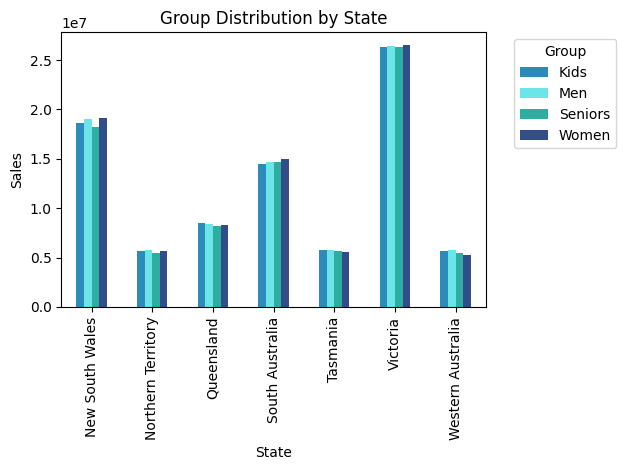

In [37]:
# Define custom colors
colors = ['#2d8bba', '#6ce5e8', '#2eaea1', '#334c8a']

# Plot group distribution by state
plt.figure(figsize=(6, 8))
data.groupby(['State', 'Group'])['Sales'].sum().unstack().plot(kind='bar', color=colors)
plt.title('Group Distribution by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
data.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,Western Australia,Kids,8,20000
1,2020-10-01,Morning,Western Australia,Men,8,20000
2,2020-10-01,Morning,Western Australia,Women,4,10000
3,2020-10-01,Morning,Western Australia,Seniors,15,37500
4,2020-10-01,Afternoon,Western Australia,Kids,3,7500


In [39]:
data['date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Generate weekly, monthly, and quarterly reports
weekly_report = data[data.index <= data['date']].resample('7D').sum(numeric_only=True)
monthly_report = data[data.index <= data['date']].resample('MS').sum(numeric_only=True)
quarterly_report = data.resample('Q').sum(numeric_only=True)

print("Weekly Report:")
display(weekly_report)
print("\nMonthly Report:")
display(monthly_report)
print("\nQuarterly Report:")
display(quarterly_report)

Weekly Report:


,Unit,Sales
Date,,
2020-10-01,10632,26580000
2020-10-08,10828,27070000
2020-10-15,10631,26577500
2020-10-22,10575,26437500
2020-10-29,7756,19390000
2020-11-05,8364,20910000
2020-11-12,8618,21545000
2020-11-19,8444,21110000
2020-11-26,9753,24382500



Monthly Report:


,Unit,Sales
Date,,
2020-10-01,45716,114290000
2020-11-01,36273,90682500
2020-12-01,54132,135330000



Quarterly Report:


,Unit,Sales
Date,,
2020-12-31,136121,340302500


In [40]:
data["Month"]=data["date"].dt.month

In [41]:
monthly_sales = data.groupby("Month")["Sales"].sum().sort_values(ascending=False)

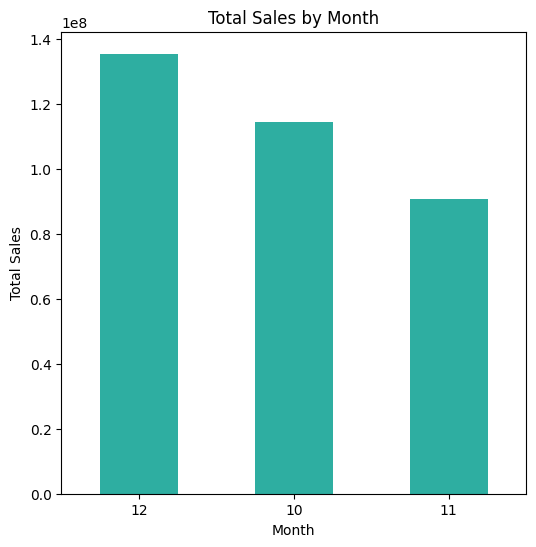

In [43]:
# Plot the data as a bar chart
plt.figure(figsize=(6, 6))
monthly_sales.plot(kind='bar',color='#2eaea1')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()

***Based on the chart above, the company's highest sales were in month 12.***

##**7. Conclusion**

In this notebook, we analyzed the sales dataset to gain valuable insights into AAL company business operations. The most important results were as follows:
- In terms of sales volume by state, the analysis revealed that Victoria state has the highest sales, while Western Australia is considered the lowest in sales.
- In terms of the customer gender(women, men, kids, and seniors), the analysis revealed that Men have the highest the most prevalent.
- Additionally, the analysis indicated that December has the highest-selling month compared to the other months.

_____